## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:
x_train.shape[0]

60000

In [0]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [0]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train)

In [0]:
y_test = keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model1 = Sequential()

#1st Conv layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

#Flatten
model1.add(Flatten())

#1st Dense layer
model1.add(Dense(128))
model1.add(Activation('relu'))

#2nd Dense layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model1.fit(x_train, y_train, nb_epoch=10, batch_size=32,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.3722 - acc: 0.8659 - val_loss: 0.2967 - val_acc: 0.8922
Epoch 2/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2300 - acc: 0.9157 - val_loss: 0.2565 - val_acc: 0.9106
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1662 - acc: 0.9381 - val_loss: 0.2615 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1143 - acc: 0.9575 - val_loss: 0.2653 - val_acc: 0.9149
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0748 - acc: 0.9717 - val_loss: 0.3104 - val_acc: 0.9109
Epoch 6/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0495 - acc: 0.9818 - val_loss: 0.3650 - val_acc: 0.9105
Epoch 7/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0349 - acc: 0.9875 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model2 = Sequential()

#1st Conv layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

#MaxPooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

#Flatten
model2.add(Flatten())

#1st Dense layer
model2.add(Dense(128))
model2.add(Activation('relu'))

#2nd Dense layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model2.fit(x_train, y_train, nb_epoch=10, batch_size=32,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.4006 - acc: 0.8551 - val_loss: 0.3179 - val_acc: 0.8824
Epoch 2/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.2608 - acc: 0.9052 - val_loss: 0.2638 - val_acc: 0.9016
Epoch 3/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2131 - acc: 0.9210 - val_loss: 0.2354 - val_acc: 0.9159
Epoch 4/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.1782 - acc: 0.9339 - val_loss: 0.2277 - val_acc: 0.9171
Epoch 5/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.1507 - acc: 0.9429 - val_loss: 0.2424 - val_acc: 0.9166
Epoch 6/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1250 - acc: 0.9519 - val_loss: 0.2480 - val_acc: 0.9184
Epoch 7/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.1070 - acc: 0.9598 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

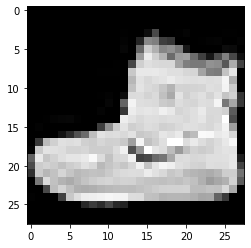

In [0]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

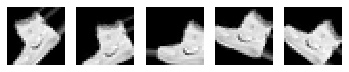

In [0]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

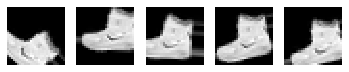

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   9/1875 [..............................] - ETA: 31s - loss: 4.0769 - acc: 0.2951

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 30s 16ms/step - loss: 0.9392 - acc: 0.6553 - val_loss: 0.4787 - val_acc: 0.8312
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6853 - acc: 0.7457 - val_loss: 0.4349 - val_acc: 0.8378
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6258 - acc: 0.7687 - val_loss: 0.4463 - val_acc: 0.8371
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5838 - acc: 0.7841 - val_loss: 0.4715 - val_acc: 0.8219
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5565 - acc: 0.7942 - val_loss: 0.4058 - val_acc: 0.8522
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5378 - acc: 0.8012 - val_loss: 0.4087 - val_acc: 0.8518
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5145 - acc: 0.8106 - val_loss: 0.3998 - val_acc: 0.8552
Epoch 8/10
1875/1875 [==============================] - 30s

###  Report the final train and validation accuracy

In [0]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 71us/step
[0.32913400255640346, 0.87845]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

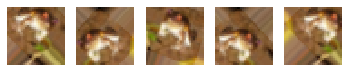

In [0]:
gen = data_gen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow((gen.next().squeeze()).astype('uint8'))
    plt.plot()